In [7]:
"""
Activity: 1.2 Nonlinear Pendulum
Name: Eric Joshua Vincent C. Reyes
ID: 2015-07981
Subject: AP156
Date(DMY): 06/08/2018
"""
act=1.2


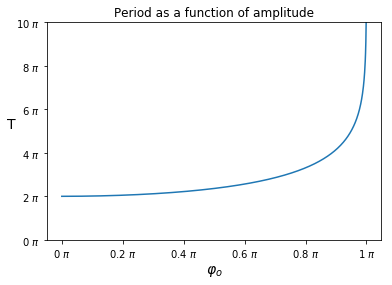

In [8]:
from scipy.special import ellipk, ellipj, ellipkinc
#from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.cm as cm
#Values below are set such that sqrt(l/g) =1 for convenience 
#Change values in practical applications correspondingly
l=1 # length of pendulum string
g=1 # gravitational const


#Initialize array for array of initial angles
phi0 = np.linspace(0,np.pi,1000) 
#Calculate the period using Elliptic integral where k**2 = sin^2(phi_o/2)
k_2 = np.sin(phi0/2)**2
T = 4*np.sqrt(l/g)*ellipk(k_2)
#Uses EllipF
#T2 = 4*np.sqrt(l/g)*ellipkinc(np.pi/2,k_2)

#Make subplots
f,ax=plt.subplots(1)
#divide x,y by pi for easier labeling
ax.plot(phi0/np.pi,T/np.pi)
#ax.plot(phi0/np.pi,T2/np.pi,label="$\\varphi_o$ (EllipK)",ls='dashed',color='g',alpha =0.4,)
#ax.legend(loc='lower right')
plt.xlabel("$\\varphi_o$",fontsize='14')
plt.ylabel("T",rotation=0,fontsize='14')
plt.ylim(0,10)

#Correcting the ticks to use pi symbols
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.2))
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=2))
plt.title("Period as a function of amplitude")

plt.savefig("-Period as a function of amplitude.png")
plt.show()

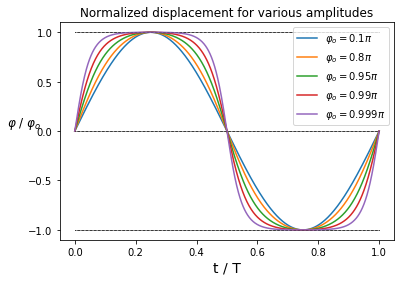

In [4]:
#Initialize list of desired initial angles w/o np.pi for convenient labeling
phi0 = np.array([1/10, 4/5, 19/20, 99/100, 999/1000])
for i in range(len(phi0)):
    #Store value for labeling
    label = phi0[i]
    #Correct value by multiplying pi
    phi0[i] *= np.pi
    #Initialize the range of the angles
    phi = np.linspace(-phi0[i],phi0[i],1000)
    m = np.sin(phi0[i]/2)**2
    
    #Calculate the period given phi_o
    T = 4*ellipk(m)
    #Generate array from t = 0 until the period. Needs to be divided by T for normalized plot later
    t = np.linspace(0,T,1000)

    #Compute for the amplitude of using ellipj [0=sin, 1=cos, 2= dn, 3=phi]
    psi = 2*np.arcsin(ellipj(t,m)[0]*np.sin(phi0[i]/2))
    
    plt.plot(t/T,psi/phi0[i],label='$\\varphi_o=$'+str(label)+'$\pi$')
    plt.xlabel("t / T",fontsize='14')
    plt.ylabel("$\\varphi$ / $\\varphi_o$",rotation=0,fontsize='12')
    plt.yticks(np.arange(-1,1.5,0.5))
    plt.legend()
    
    #for convenience
    plt.plot(t/T,[max(psi/phi0[i])]*1000,linewidth=0.5, ls='dotted',color='black')
    plt.plot(t/T,[min(psi/phi0[i])]*1000,linewidth=0.5, ls='dotted',color='black')
    plt.plot(t/T,[0]*1000,linewidth=0.5, ls='dotted',color='black')

    plt.title("Normalized displacement for various amplitudes")
plt.savefig("-Normalized displacement for various amplitudes.png")
plt.show()


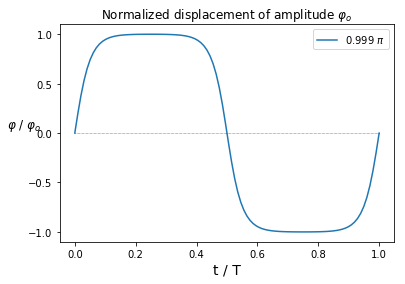

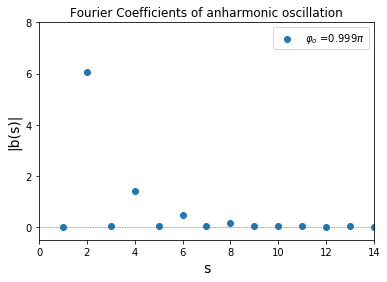

In [9]:
#specify number of data points
N = 100

#set initial angle
phi0 = .999
label = phi0
phi0 *= np.pi
#generate array that contains the angles from -phi_o to phi_o
phi = np.linspace(-phi0,phi0,N)

#generate the period for each phi_o
T = 4*ellipk(np.sin(phi0/2)**2)
m = np.sin(phi0/2)**2
#Generate array from t = 0 until the period. Needs to be divided by T for normalized plot later
t = np.linspace(0,T,N)

#Compute for the amplitude of using ellipj [0=sin, 1=cos, 2= dn, 3=phi]
psi = 2*np.arcsin(ellipj(t,m)[0]*np.sin(phi0/2)) / phi0
t /= T
#Visualization of the signal:
plt.plot(t,psi,label=str(label)+' $\pi$')
plt.xlabel("t / T",fontsize='14')
plt.ylabel("$\\varphi$ / $\\varphi_o$",rotation=0,fontsize='12')
plt.yticks(np.arange(-1,2,0.5))
plt.legend()
plt.plot(t,[0]*N,linewidth=0.5, ls='dotted',color='black')
plt.title("Normalized displacement of amplitude $\\varphi_o$")

plt.savefig("Normalized displacement of amplitude.png")
plt.show()

#computing for FFT of the normalized displacement
bs = np.abs(np.fft.fft(psi,N))/np.sqrt(N)
s = np.arange(1,len(bs)+1)

#Scatter plot:
plt.scatter(s,bs, label="$\\varphi_o$ ="+str(label)+"$\pi$")
plt.xlim(0,14)

#insert 0 line as guide
zline = np.array([0]*50)
plt.plot(zline,'--',linewidth=0.5)

plt.ylabel("|b(s)|",fontsize='14')
plt.xlabel("s",fontsize='14')
plt.title("Fourier Coefficients of anharmonic oscillation")
plt.ylim(-.5,8)
plt.yticks(np.arange(0,max(bs)+2,2.0))
plt.legend()

plt.savefig("Fourier Coefficients of anharmonic oscillation.png")
plt.show()

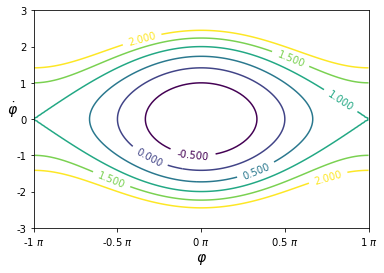

In [6]:
N = 100
phi = np.linspace(-np.pi,np.pi,N)
phidot = np.linspace(-3,3,N)
P,PD = np.meshgrid(phi,phidot)
Z = (l/(2*g))*PD**2-np.cos(P)
E_mgl = np.arange(-1,5) / 2
f,ax=plt.subplots(1)
CS = ax.contour(P/np.pi,PD,Z,E_mgl)
ax.clabel(CS, inline=1,fontsize=10)

#Correcting the ticks to use pi symbols
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=1))

#Comment in for box legend
#labels = np.arange(-1,5)
#for i in range(len(labels)):
    #CS.collections[i].set_label("E="+str(labels[i])+"/2")
#plt.legend(loc='upper left')

plt.xlabel("$\\varphi$",fontsize='14')
plt.ylabel("$\dot\\varphi$",rotation=0,fontsize='14')

plt.savefig("Energy contours.png")
plt.show()

